In [16]:
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
RESULT_FOLDER = ["results1", "results2"]

In [4]:
all_res = []
for folder in RESULT_FOLDER:
    for file in os.listdir(folder):
        with open(folder + "/" + file, "rb") as f:
            all_res.append(pickle.load(f))

In [8]:
# parse 2 level lists
all_res2 = [j for i in all_res for j in i]

In [9]:
len(all_res2)

162

In [10]:
# sanity check
overall_count = sum(len(x) for x in all_res)
print(overall_count == len(all_res2)) 

True


In [12]:
a = pd.DataFrame(all_res2)

In [14]:
a.head()

,0,1
0,"(kfac, CartPole-v1, {'OVERALL_STEPS': 50000, '...","(11.0, 102.0, 23.0, 19.0, 24.0, 12.0, 20.0, 11..."
1,"(kfac, CartPole-v1, {'OVERALL_STEPS': 50000, '...","(16.0, 49.0, 17.0, 25.0, 19.0, 34.0, 25.0, 13...."
2,"(kfac, CartPole-v1, {'OVERALL_STEPS': 50000, '...","(19.0, 44.0, 42.0, 30.0, 28.0, 17.0, 22.0, 11...."
3,"(kfac, CartPole-v1, {'OVERALL_STEPS': 50000, '...","(16.0, 15.0, 20.0, 13.0, 17.0, 16.0, 34.0, 14...."
4,"(kfac, CartPole-v1, {'OVERALL_STEPS': 50000, '...","(9.0, 18.0, 17.0, 16.0, 28.0, 19.0, 23.0, 17.0..."


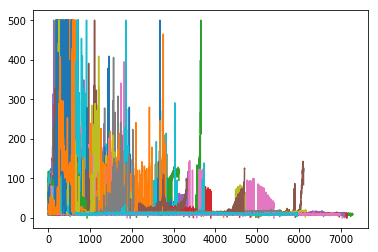

In [17]:
fig = plt.figure()
for a in all_res2:
    plt.plot(a[1])